In the competitive landscape of the restaurant industry, understanding the factors that contribute to a restaurant's revenue can provide valuable insights for business strategy and operational improvements. Predictive modeling offers a robust approach to forecast future revenues based on historical data, enabling stakeholders to make informed decisions. This analysis focuses on utilizing a RandomForestRegressor, a powerful machine learning model known for its accuracy and ability to handle large datasets with numerous features.

One of the key advantages of RandomForest is its capability to rank the importance of features based on how they improve the predictive performance of the model. By examining which variables significantly impact revenue, restaurant owners and managers can identify potential areas for investment or improvement. For instance, variables related to location demographics, real estate characteristics, and competitive environment might emerge as critical drivers of revenue.

In this study, we employ RandomForestRegressor to predict annual transformed revenue of restaurants and subsequently analyze the model to identify the most influential factors. We aim to provide actionable insights that could guide strategic planning and tactical adjustments in the operational practices of restaurants. By focusing on the top features and excluding the least important ones, our analysis ensures clarity and focus, highlighting the most substantial contributors to revenue generation.

Link to Presentation: https://youtu.be/eXRhpUnDQmg 

Link to GitHub: https://github.com/N5cent28/CUB-Public

Loading and Preprocessing Data
First I handled missing values, encoded categorical data into numerical, and considered creating new features based on existing data.

In [1]:
import pandas as pd

train_data = pd.read_csv('/Users/noahnicol/Desktop/MS-DS CU Boulder/Machine Learning/SupervisedFinal2/train.csv (1).zip')
test_data = pd.read_csv('/Users/noahnicol/Desktop/MS-DS CU Boulder/Machine Learning/SupervisedFinal2/test.csv (1).zip')

# Convert 'Open Date' to datetime and calculate 'Days Open' for better ML
train_data['Days_Open'] = (pd.Timestamp('today') - pd.to_datetime(train_data['Open Date'])).dt.days

# inspect data types (want int/float64)
print(train_data.head)
print(train_data.dtypes)
# print(y_train.head)

<bound method NDFrame.head of       Id   Open Date        City  City Group Type  P1   P2   P3   P4  P5  ...  \
0      0  07/17/1999    İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   
1      1  02/14/2008      Ankara  Big Cities   FC   4  5.0  4.0  4.0   1  ...   
2      2  03/09/2013  Diyarbakır       Other   IL   2  4.0  2.0  5.0   2  ...   
3      3  02/02/2012       Tokat       Other   IL   6  4.5  6.0  6.0   4  ...   
4      4  05/09/2009   Gaziantep       Other   IL   3  4.0  3.0  4.0   2  ...   
..   ...         ...         ...         ...  ...  ..  ...  ...  ...  ..  ...   
132  132  06/25/2008     Trabzon       Other   FC   2  3.0  3.0  5.0   4  ...   
133  133  10/12/2006       İzmir  Big Cities   FC   4  5.0  4.0  4.0   2  ...   
134  134  07/08/2006     Kayseri       Other   FC   3  4.0  4.0  4.0   2  ...   
135  135  10/29/2010    İstanbul  Big Cities   FC   4  5.0  4.0  5.0   2  ...   
136  136  09/01/2009    İstanbul  Big Cities   FC   4  5.0  3.0  5.0   2  ...  

In [3]:
import pandas as pd

# Assuming you've already loaded your data into `train_data`
Q1 = train_data['revenue'].quantile(0.25)
Q3 = train_data['revenue'].quantile(0.75)
IQR = Q3 - Q1

# Defining the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering the data
filtered_train_data = train_data[(train_data['revenue'] >= lower_bound) & (train_data['revenue'] <= upper_bound)]

print(f"Original Data Size: {train_data.shape[0]}")
print(f"Filtered Data Size: {filtered_train_data.shape[0]}")

Original Data Size: 137
Filtered Data Size: 129


Building a Predictive Model
I started with Random Forest as it is robust to overfitting and seemed to work well with a mixture of numerical and categorical data. (GeeksforGeeks)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Encode categorical variables using one-hot encoding before dropping columns
filtered_train_data = pd.get_dummies(filtered_train_data, columns=['City Group', 'City', 'Type'])

# Exclude non-useful columns and target column for features
X_train_filtered = filtered_train_data.drop(['Id', 'Open Date', 'revenue'], axis=1)
y_train_filtered = filtered_train_data['revenue']

# Splitting the data
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_filtered, y_train_filtered, test_size=0.2, random_state=42)

# Training the model
model_filtered = RandomForestRegressor(n_estimators=100, random_state=42)
model_filtered.fit(X_train_split, y_train_split)

# Predicting and evaluating the model
y_pred_filtered = model_filtered.predict(X_val_split)
rmse_filtered = np.sqrt(mean_squared_error(y_val_split, y_pred_filtered))
print("Filtered Validation RMSE:", rmse_filtered)

Filtered Validation RMSE: 1181814.9663510362


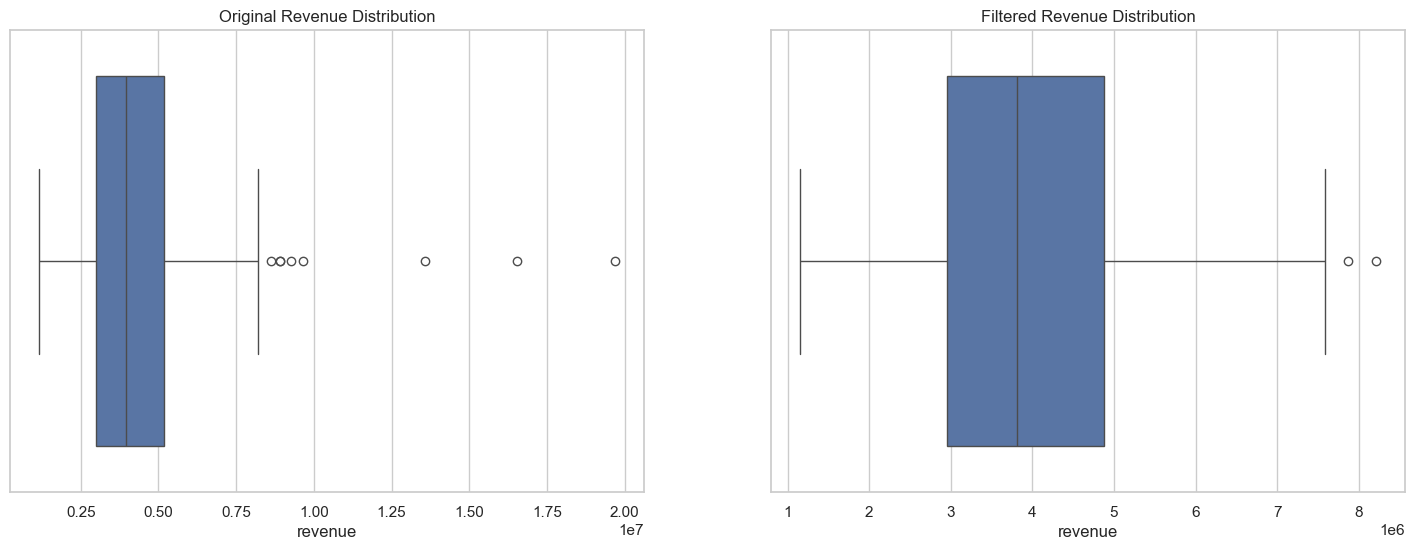

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plotting the original revenue distribution
sns.boxplot(x=train_data['revenue'], ax=axes[0])
axes[0].set_title('Original Revenue Distribution')

# Plotting the filtered revenue distribution
sns.boxplot(x=filtered_train_data['revenue'], ax=axes[1])
axes[1].set_title('Filtered Revenue Distribution')

plt.show()

An RMSE of >1,000,000 is quite high, let's see if I can improve it. Below are some strategies to improve a regression model.

1. Feature Engineering
Date Features: I could add other time-related features like the month or year the restaurant opened to capture any seasonal trends or economic cycles affecting revenues.
Interaction Terms: I could create interaction features between that logically interact like demographic factors with type of restaurant or location.
Polynomial Features: For numerical columns, I certainly should experiment with polynomial features to model non-linear relationships.
Aggregate City Data: I could try to factor or normalize to city as some cities are much more likely to produce a profit due to increased consumer spending.
2. Model Selection and Tuning
Experiment with Different Models: Besides RandomForest, try other algorithms like Gradient Boosting Machines (GBM), XGBoost, or neural networks to see if they perform better.
Hyperparameter Tuning: Use grid search or randomized search to optimize the hyperparameters of your model. For RandomForest, important parameters to tune could include n_estimators, max_depth, min_samples_split, and min_samples_leaf.
Ensemble Methods: Consider combining the predictions of several models. Simple averaging, weighted averaging where more accurate models are given a higher weight, or even more complex ensemble methods like stacking could be beneficial.
3. Validation Strategy
Cross-Validation: Instead of a simple train-test split, use K-fold cross-validation to ensure the model's performance is robust and not just tuned to a particular subset of the training data.
Feature Importance Analysis: Analyze which features are most important for the prediction and focus on optimizing the preprocessing and feature engineering for those key features.
4. Incorporate Domain Knowledge
If we had insights into factors that typically influence restaurant revenues, I'd incorporate this knowledge into the model.

In [19]:
# Starting with ML model comparison
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Split the data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_filtered, y_train_filtered, test_size=0.2, random_state=42)

# Initialize models
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train and evaluate each model
models = [rf, gbm, xgb]
results = {}
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train_split, y_train_split)
    y_pred = model.predict(X_val_split)
    rmse = np.sqrt(mean_squared_error(y_val_split, y_pred))
    results[model_name] = rmse

# Print RMSE of each model
for model_name, rmse in results.items():
    print(f"{model_name} Validation RMSE: {rmse}")


RandomForestRegressor Validation RMSE: 1181814.9663510362
GradientBoostingRegressor Validation RMSE: 1256770.2132825805
XGBRegressor Validation RMSE: 1206188.128268033


In [16]:
# Gradient boosting was moderately superior the first time I ran this, continue by adjusting parameters below
from sklearn.model_selection import GridSearchCV

# Parameter grid to search
param_grid = {
    'n_estimators': [5, 10, 20, 100],
    'learning_rate': [0.1, 0.2, 0.25],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [2, 3, 4]
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train_filtered, y_train_filtered)

best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)

print("Best parameters:", best_params)
print("Best CV RMSE:", best_rmse)


Best parameters: {'learning_rate': 0.25, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 5}
Best CV RMSE: 1413846.752712143


This greatly reduced the RMSE from the first time I ran it! While still high and increased, it's a proof of concept to try different combinations of parameters. I tried to look at the priniciple components and eliminate less important ones below. While this decreases the RMSE, it is still above the RMSE from RandomForestRegressor

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the data before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_filtered)

# Apply PCA to keep 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("Original number of features:", X_train_filtered.shape[1])
print("Reduced number of features:", X_pca.shape[1])
# Split the data transformed by PCA
X_train_pca, X_val_pca, y_train, y_val = train_test_split(X_pca, y_train_filtered, test_size=0.2, random_state=42)

# Train a RandomForest model with the PCA-transformed data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_pca, y_train)
y_pred_pca = rf_model.predict(X_val_pca)
rmse_pca = np.sqrt(mean_squared_error(y_val, y_pred_pca))
print("Validation RMSE with PCA:", rmse_pca)


Original number of features: 77
Reduced number of features: 39
Validation RMSE with PCA: 1269449.76805011


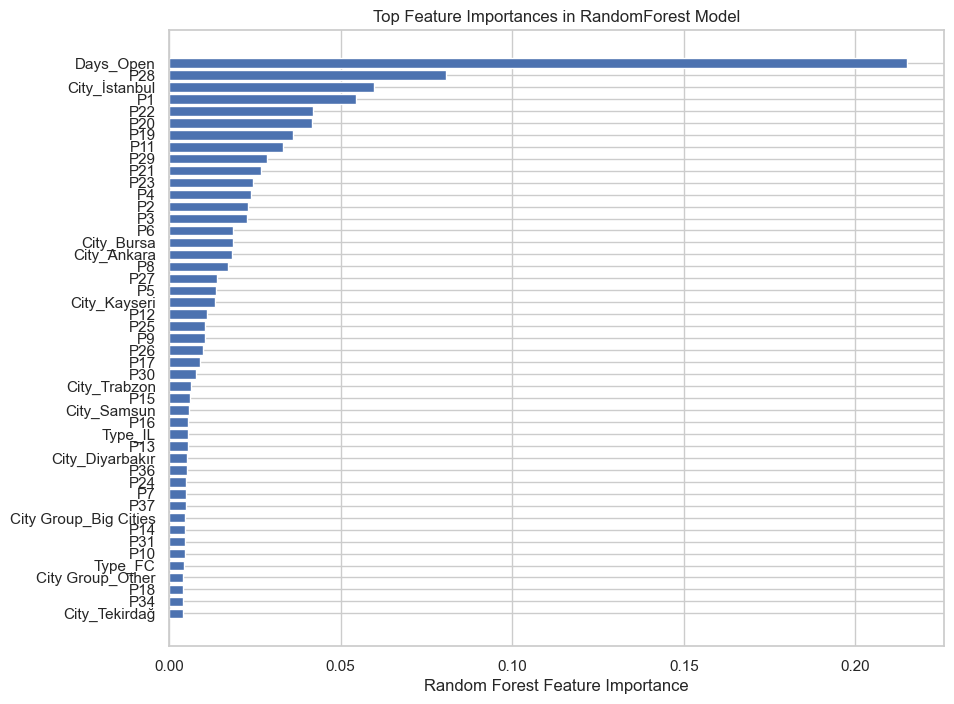

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the RandomForest model and feature importance have already been computed
rf_model_original = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_original.fit(X_train_split, y_train_split)  # Ensure this uses the non-PCA data

feature_importance = rf_model_original.feature_importances_
sorted_idx = np.argsort(feature_importance)

# Number of top features to display
num_features_to_display = len(sorted_idx) - 30  # Adjust 20 to your preference for "last" features to cut

plt.figure(figsize=(10, 8))
plt.barh(range(num_features_to_display), feature_importance[sorted_idx][-num_features_to_display:], align='center')
plt.yticks(range(num_features_to_display), [X_train_split.columns[i] for i in sorted_idx[-num_features_to_display:]])
plt.xlabel("Random Forest Feature Importance")
plt.title("Top Feature Importances in RandomForest Model")
plt.show()


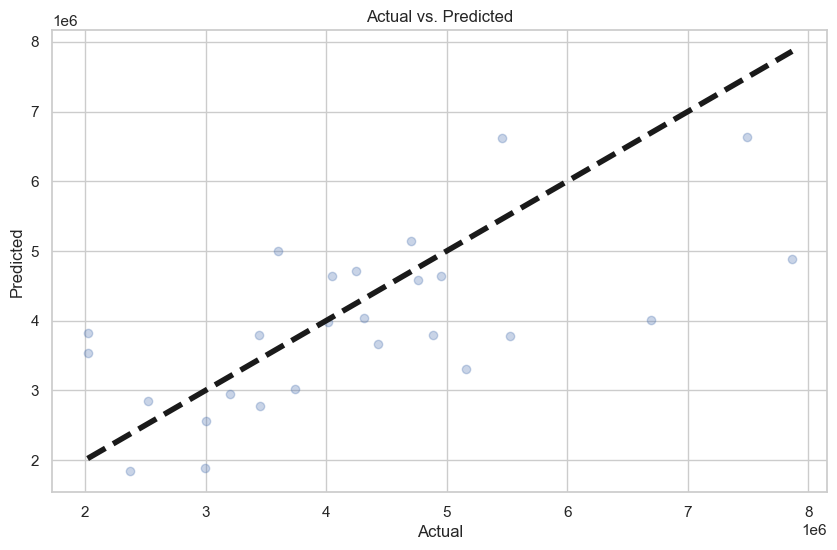

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val_split, y_pred, alpha=0.3)
plt.plot([y_val_split.min(), y_val_split.max()], [y_val_split.min(), y_val_split.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [12]:
from sklearn.svm import SVR

# Initialize and train the SVR model with RBF kernel
svm_model = SVR(kernel='rbf', C=100, gamma=0.1)
svm_model.fit(X_train_split, y_train_split)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_val_split)
rmse_svm = np.sqrt(mean_squared_error(y_val_split, y_pred_svm))
print("Validation RMSE for SVM:", rmse_svm)

Validation RMSE for SVM: 1558068.3531164252


In [13]:
from sklearn.neural_network import MLPRegressor

# Initialize and train a Multi-layer Perceptron
nn_model = MLPRegressor(hidden_layer_sizes=(50, 100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
nn_model.fit(X_train_split, y_train_split)

# Predict and evaluate
y_pred_nn = nn_model.predict(X_val_split)
rmse_nn = np.sqrt(mean_squared_error(y_val_split, y_pred_nn))
print("Validation RMSE for Neural Network:", rmse_nn)


Validation RMSE for Neural Network: 1599333.968864213


In [14]:
from sklearn.ensemble import StackingRegressor

# Define the base models
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('svm', SVR(kernel='rbf'))
]

# Initialize and train a stacking model
stack_model = StackingRegressor(estimators=estimators, final_estimator=GradientBoostingRegressor(random_state=42))
stack_model.fit(X_train_split, y_train_split)

# Predict and evaluate
y_pred_stack = stack_model.predict(X_val_split)
rmse_stack = np.sqrt(mean_squared_error(y_val_split, y_pred_stack))
print("Validation RMSE for Stacking:", rmse_stack)


Validation RMSE for Stacking: 1575089.5648951223


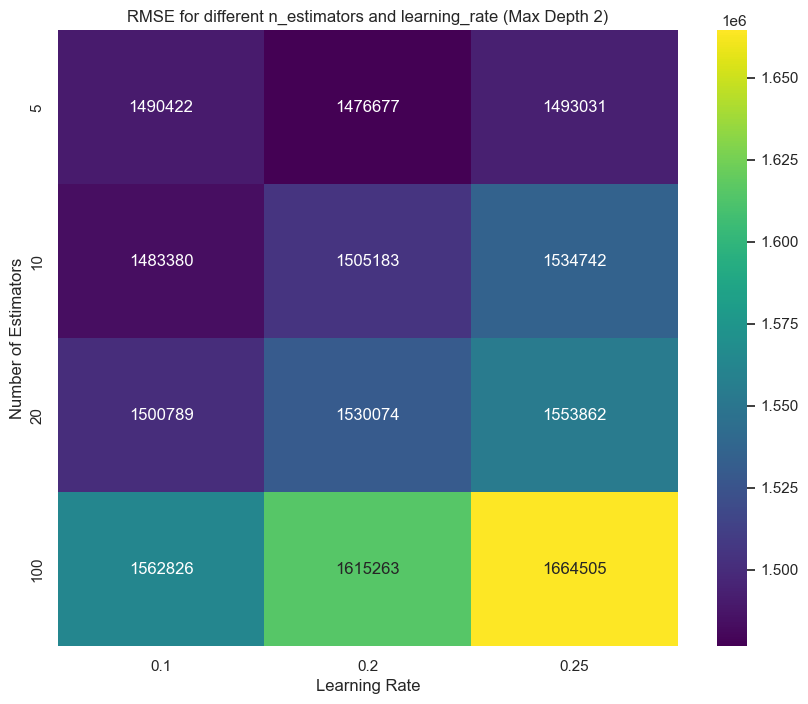

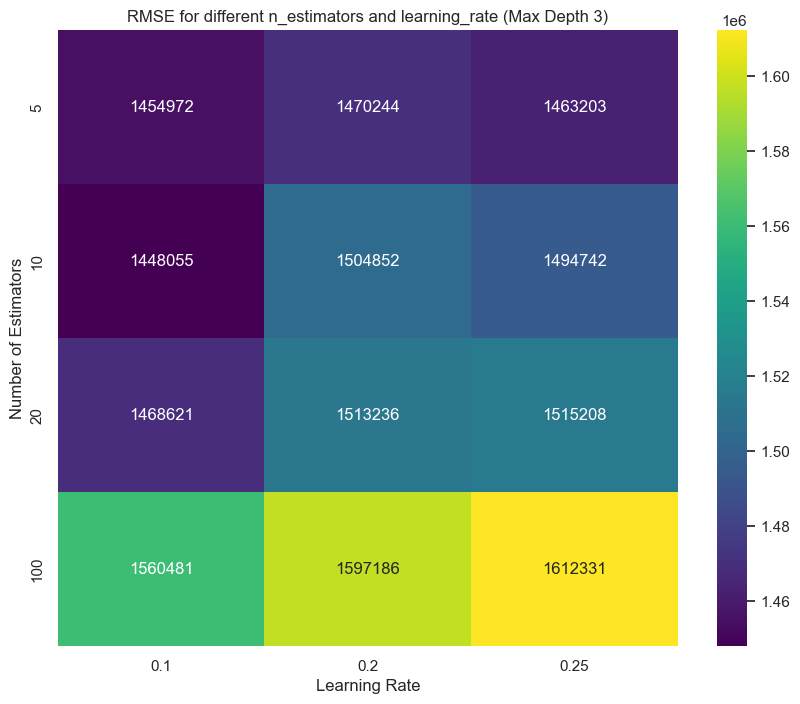

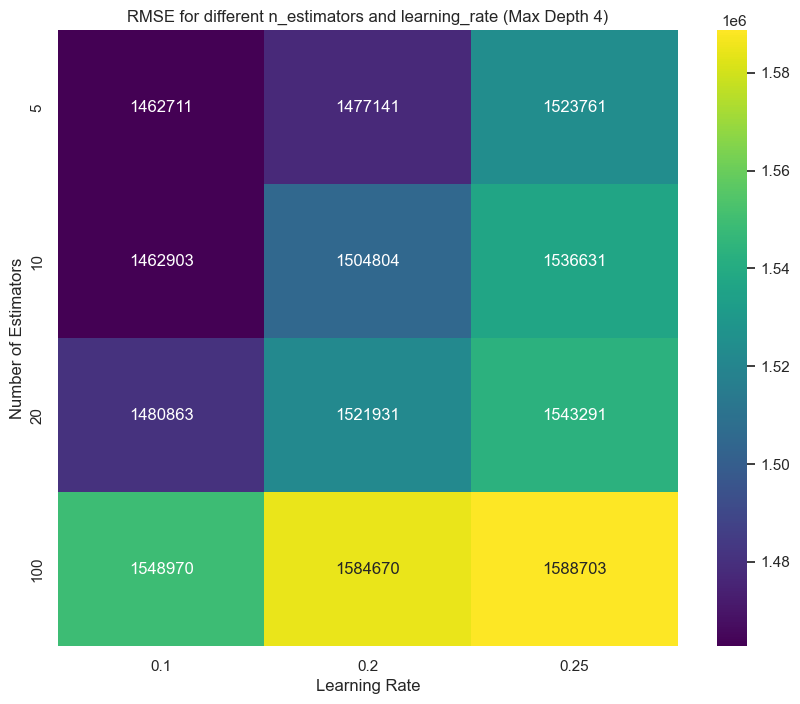

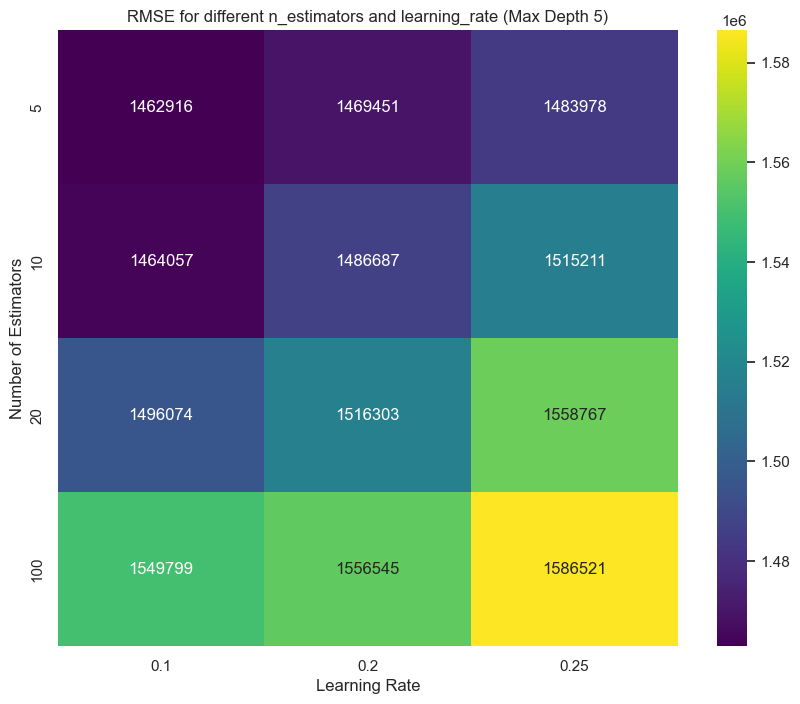

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

results = grid_search.cv_results_
params = pd.DataFrame({
    'param_max_depth': results['param_max_depth'],
    'param_n_estimators': results['param_n_estimators'],
    'param_learning_rate': results['param_learning_rate'],
    'RMSE': np.sqrt(-results['mean_test_score'])  # Convert negative MSE to positive RMSE
})

# Aggregate RMSE by taking the mean for each combination of parameters within each max_depth
grouped = params.groupby(['param_max_depth', 'param_n_estimators', 'param_learning_rate']).agg({'RMSE': 'mean'}).reset_index()

# Now create heatmaps for each depth
for depth in grouped['param_max_depth'].unique():
    subset = grouped[grouped['param_max_depth'] == depth]
    pivot_table = subset.pivot(index='param_n_estimators', columns='param_learning_rate', values='RMSE')
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='viridis')
    plt.title(f'RMSE for different n_estimators and learning_rate (Max Depth {depth})')
    plt.xlabel('Learning Rate')
    plt.ylabel('Number of Estimators')
    plt.show()


In order to include 3 parameters in one plot, I created this 3D representation. I'm doubtful it made it much clearer though.

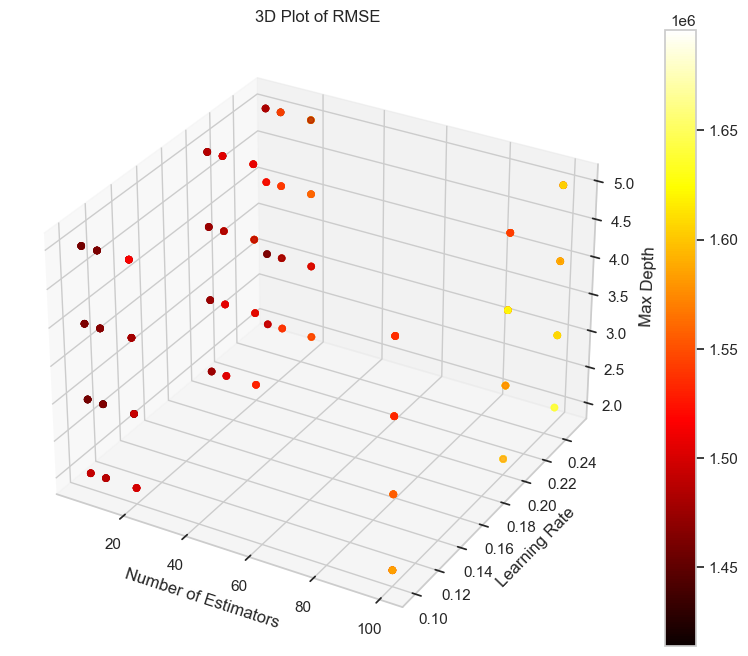

In [22]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Convert columns to float for plotting
x = params['param_n_estimators'].astype(float)
y = params['param_learning_rate'].astype(float)
z = params['param_max_depth'].astype(float)
c = params['RMSE']

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
ax.set_xlabel('Number of Estimators')
ax.set_ylabel('Learning Rate')
ax.set_zlabel('Max Depth')
fig.colorbar(img)
plt.title('3D Plot of RMSE')
plt.show()

Feature importance analysis not only enhances the transparency of the model by revealing which factors are influential, but it also aids in optimizing resources. For businesses, this means prioritizing changes or interventions that could lead to the most significant financial outcomes. Moreover, by excluding less impactful features, models can be simplified, potentially improving their efficiency and reducing the risk of overfitting.

Link to presentation: https://youtu.be/eXRhpUnDQmg

Citations:
“What Are the Advantages and Disadvantages of Random Forest?” GeeksforGeeks, GeeksforGeeks, 15 Feb. 2024, www.geeksforgeeks.org/what-are-the-advantages-and-disadvantages-of-random-forest/. 
“Restaurant Revenue Prediction.” Kaggle, www.kaggle.com/c/restaurant-revenue-prediction/data. Accessed 30 Apr. 2024. 
williamirwin14. “The Happy Life of Bob’s Burgers.” The Blackwell Philosophy and Pop Culture Series, 24 Sept. 2020, andphilosophy.com/2020/09/24/the-happy-life-of-bobs-burgers/. 
